In [64]:
import torch
import torch.nn as nn
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [65]:
# Setup training data
train_data = datasets.MNIST(
    root="data", # where to download data to?
    train=True, # get training data
    download=True, # download data if it doesn't exist on disk
    transform=ToTensor(), # images come as PIL format, we want to turn into Torch tensors
    target_transform=None # you can transform labels as well
)

# Setup testing data
test_data = datasets.MNIST(
    root="data",
    train=False, # get test data
    download=True,
    transform=ToTensor()
)

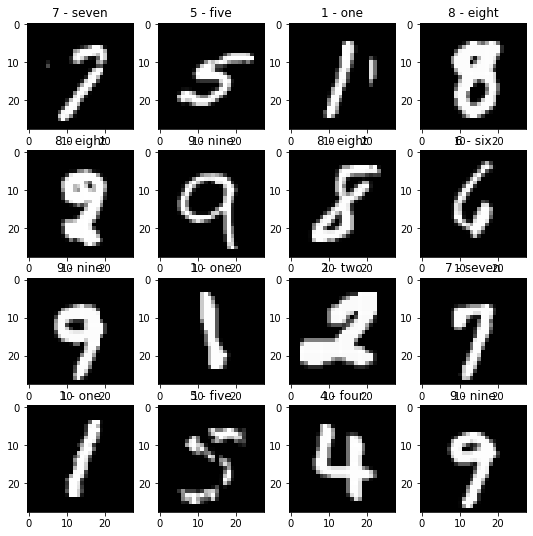

In [66]:
fig = plt.figure(figsize = (9,9))
rows, cols = 4, 4
for i in range(1, rows*cols + 1):
  randIndex = torch.randint(0, len(train_data), size=[1]).item()
  img, label = train_data[randIndex]
  fig.add_subplot(rows, cols, i)
  plt.imshow(img.squeeze(), cmap="gray")
  plt.title(class_names[label])
  plt.axis = False

In [67]:
from torch.utils.data import DataLoader
train_loader = DataLoader(train_data, 32)
test_loader = DataLoader(test_data, 32)

In [97]:
from torch.nn.modules.activation import ReLU
num_layers = 2
num_neurons = 64
layer = nn.Sequential(
    nn.Linear(num_neurons, num_neurons),
    nn.Dropout(0.1),
    nn.GELU()
)
class NumberRecognizer(nn.Module):
  def __init__(self):
    super().__init__()
    self.flatter = nn.Sequential(
        nn.Flatten(),
        nn.Linear(784,num_neurons),
        nn.Dropout(0.1),
        nn.GELU()
    ) 
    self.transformer = nn.ModuleList([layer for i in range(num_layers)])
    self.classifier = nn.Linear(num_neurons,10)
  def forward(self, x):
    x = self.flatter(x)
    for i, l in enumerate(self.transformer):
        x = self.transformer[i // 2](x) + l(x)
    return self.classifier(x)

class NumberConv(nn.Module):
  def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
    super().__init__()
    self.block1 = nn.Sequential(
        nn.Conv2d(input_shape, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.Conv2d(hidden_units, hidden_units, kernel_size=3, stride=1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size= 2, stride=2)
    )
    self.block2 = nn.Sequential(
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.Conv2d(hidden_units, hidden_units, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2)
        )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(hidden_units*7*7,output_shape)
    )
  def forward(self, x):
    return self.classifier(self.block2(self.block1(x)))

In [98]:
#!git clone "https://github.com/RayanKamarinchev/Helper_functions_ml"
from Helper_functions_ml import train
model = NumberConv(1,32,10)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params = model.parameters(), lr=1e-3)
res = train.train.train(model, train_loader, test_loader, optimizer, loss_fn, 10, device)

  0%|          | 0/10 [00:00<?, ?it/s]

KeyboardInterrupt: ignored